# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
#!pip install citipy

In [150]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data_weatherpy/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [123]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

In [124]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [125]:
# Create empty lists to store data from API calls
new_cities = []
lat = []
lng = []
max_temp = []
wind_speed = []
humidity = []
cloudiness = []
country = []
datetime = []

counter = 0

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    counter += 1
    
    try:
        new_cities.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        datetime.append(response['dt'])
        print(f"Processing record {counter} | {city}")
    
    except:
        print("City not found. Skipping...")
        pass

Processing record 1 | atambua
Processing record 2 | jamestown
Processing record 3 | gigmoto
City not found. Skipping...
Processing record 5 | ilulissat
Processing record 6 | ushuaia
Processing record 7 | englehart
Processing record 8 | chara
Processing record 9 | vila franca do campo
Processing record 10 | puerto ayora
Processing record 11 | esperance
Processing record 12 | mananara
Processing record 13 | san cristobal
Processing record 14 | rikitea
City not found. Skipping...
Processing record 16 | butaritari
Processing record 17 | tasiilaq
Processing record 18 | cidreira
Processing record 19 | vaitape
Processing record 20 | busselton
Processing record 21 | saskylakh
Processing record 22 | yulara
Processing record 23 | leh
Processing record 24 | kapaa
Processing record 25 | szczecinek
Processing record 26 | khatanga
Processing record 27 | weirton
Processing record 28 | vaini
Processing record 29 | diego de almagro
Processing record 30 | albany
Processing record 31 | port macquarie
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [126]:
# Create dataframe to store results
weather_data = pd.DataFrame({
    'City':new_cities,
    'Lat':lat,
    'Lng':lng,
    'Max Temp':max_temp,
    'Humidity':humidity,
    'Cloudiness':cloudiness,
    'Wind Speed': wind_speed,
    'Country': country,
    'Date': datetime
})

In [127]:
# Visualize to confirm data appears
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atambua,-9.1061,124.8925,78.19,79,94,3.06,ID,1616804091
1,Jamestown,42.0970,-79.2353,43.00,93,90,12.30,US,1616804092
2,Gigmoto,13.7796,124.3900,81.37,80,100,8.99,PH,1616804092
3,Ilulissat,69.2167,-51.1000,-13.00,48,14,7.36,GL,1616804092
4,Ushuaia,-54.8000,-68.3000,50.00,62,75,5.75,AR,1616804093


In [151]:
# Save Data to csv
weather_data.to_csv(output_data_file)

In [152]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,5.610000e+02
mean,19.105571,19.436865,57.490374,71.511586,50.926916,7.702014,1.616804e+09
std,32.638143,90.365266,24.655184,22.625609,38.167441,5.595209,1.093986e+02
min,-54.800000,-175.200000,-32.460000,4.000000,0.000000,0.200000,1.616803e+09
25%,-7.200000,-60.438800,42.800000,61.000000,14.000000,3.440000,1.616804e+09
50%,19.933300,24.731400,65.080000,76.000000,45.000000,6.130000,1.616804e+09
75%,45.616900,98.333200,77.000000,89.000000,90.000000,10.360000,1.616804e+09
max,78.218600,179.316700,89.600000,100.000000,100.000000,28.250000,1.616804e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [131]:
# Skipping as no cities have humidity greater than 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

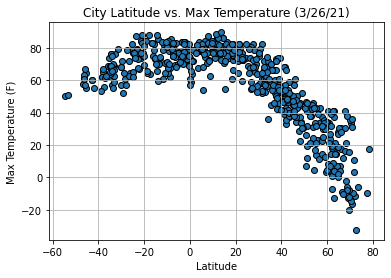

In [182]:
plt.scatter(weather_data['Lat'],weather_data['Max Temp'],marker='o',edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title ('City Latitude vs. Max Temperature (3/26/21)')
plt.grid(True)

plt.savefig('output_data_weatherpy/Latitude_vs_MaxTemp.png',bbox_inches='tight',facecolor='w')

plt.show()

# Plotting relationship between latitude and max temperature.
# Max temperature is the highest for cities near the equator while lowest for those in northern hemisphere.

## Latitude vs. Humidity Plot

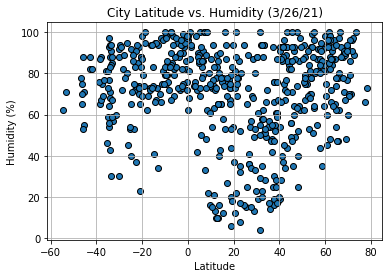

In [183]:
plt.scatter(weather_data['Lat'],weather_data['Humidity'],marker='o',edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title ('City Latitude vs. Humidity (3/26/21)')
plt.grid(True)

plt.savefig('output_data_weatherpy/Latitude_vs_Humidity.png',bbox_inches='tight',facecolor='w')

plt.show()
# Plotting relationship between latitude and humidity.
# There is no significant trend between latitude and humidity. Cities near latitude of 20 generally seems to have lower humidity.

## Latitude vs. Cloudiness Plot

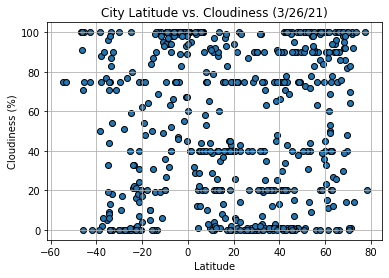

In [184]:
plt.scatter(weather_data['Lat'],weather_data['Cloudiness'],marker='o',edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title ('City Latitude vs. Cloudiness (3/26/21)')
plt.grid(True)

plt.savefig('output_data_weatherpy/Latitude_vs_Cloudiness.png',bbox_inches='tight',facecolor='w')

plt.show()
# Plotting relationship between latitude and cloudiness.
# There is no significant trend between latitude and cloudiness.

## Latitude vs. Wind Speed Plot

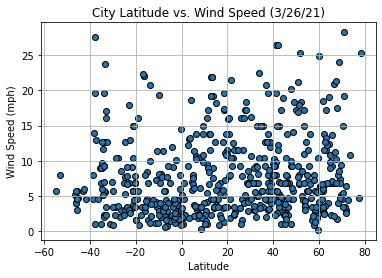

In [187]:
plt.scatter(weather_data['Lat'],weather_data['Wind Speed'],marker='o',edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title ('City Latitude vs. Wind Speed (3/26/21)')
plt.grid(True)

plt.savefig('output_data_weatherpy/Latitude_vs_Wind_Speed.png',bbox_inches='tight',facecolor='w')

plt.show()
# Plotting relationship between latitude and wind speed.
# There is no significant trend between latitude and wind speed.

## Linear Regression

In [136]:
# Split data into northern and souther hemisphere based on latitude
northern_df = weather_data.loc[weather_data['Lat'] >=0,:]
southern_df = weather_data.loc[weather_data['Lat'] < 0,:]

In [199]:
# Quick check on northern hemisphere
northern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Jamestown,42.0970,-79.2353,43.00,93,90,12.30,US,1616804092
2,Gigmoto,13.7796,124.3900,81.37,80,100,8.99,PH,1616804092
3,Ilulissat,69.2167,-51.1000,-13.00,48,14,7.36,GL,1616804092
5,Englehart,47.8169,-79.8664,28.40,74,1,4.61,CA,1616804093
6,Chara,56.9064,118.2631,22.78,92,100,1.66,RU,1616804093


In [200]:
# Quick check on southern hemisphere
southern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atambua,-9.1061,124.8925,78.19,79,94,3.06,ID,1616804091
4,Ushuaia,-54.8000,-68.3000,50.00,62,75,5.75,AR,1616804093
8,Puerto Ayora,-0.7393,-90.3518,80.01,86,67,5.99,EC,1616803984
9,Esperance,-33.8667,121.9000,57.20,88,0,12.66,AU,1616803858
10,Mananara,-16.1667,49.7667,75.07,94,84,2.95,MG,1616804094


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7818026781717706


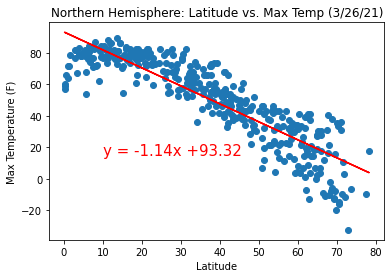

In [188]:
x_values = northern_df['Lat']
y_values = northern_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere: Latitude vs. Max Temp (3/26/21)')
plt.annotate(line_eq,(10,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save plot as png
plt.savefig('output_data_weatherpy/northernhem_maxtemp.png',bbox_inches='tight',facecolor='w')

plt.show()
# Plotting max temperature trend in northern hemisphere.
# Max temperature decreases as you increase in latitude.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.3690847529367754


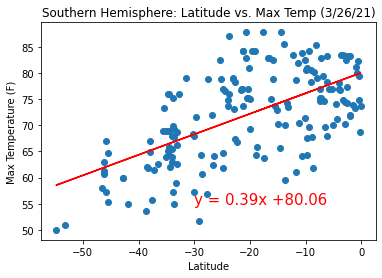

In [189]:
x_values = southern_df['Lat']
y_values = southern_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere: Latitude vs. Max Temp (3/26/21)')
plt.annotate(line_eq,(-30,55),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save plot as png
plt.savefig('output_data_weatherpy/southernhem_maxtemp.png',bbox_inches='tight',facecolor='w')

plt.show()
# Plotting max temperature trend in southern hemisphere.
# Max temperature decreases as you decrease in latitude.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.044997602383069366


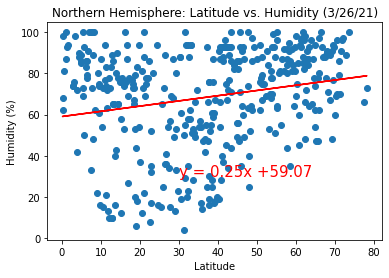

In [193]:
x_values = northern_df['Lat']
y_values = northern_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere: Latitude vs. Humidity (3/26/21)')
plt.annotate(line_eq,(30,30),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save plot as png
plt.savefig('output_data_weatherpy/northernhem_humidity.png',bbox_inches='tight',facecolor='w')

plt.show()
# Plotting humidity trend in northern hemisphere.
# There is no significant trend observed.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.10247773274555846


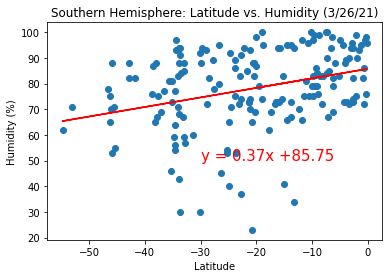

In [194]:
x_values = southern_df['Lat']
y_values = southern_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere: Latitude vs. Humidity (3/26/21)')
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save plot as png
plt.savefig('output_data_weatherpy/southernhem_humidity.png',bbox_inches='tight',facecolor='w')

plt.show()
# Plotting humidity trend in souther hemisphere.
# There is no significant trend observed.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.030960352720822346


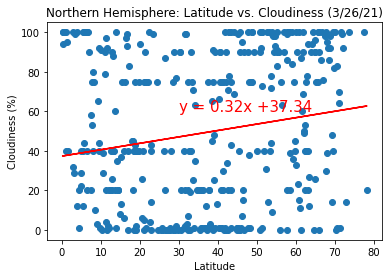

In [195]:
x_values = northern_df['Lat']
y_values = northern_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere: Latitude vs. Cloudiness (3/26/21)')
plt.annotate(line_eq,(30,60),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save plot as png
plt.savefig('output_data_weatherpy/northernhem_cloudiness.png',bbox_inches='tight',facecolor='w')

plt.show()
# Plotting cloudiness trend in northern hemisphere.
# There is no significant trend observed.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.07576976713868132


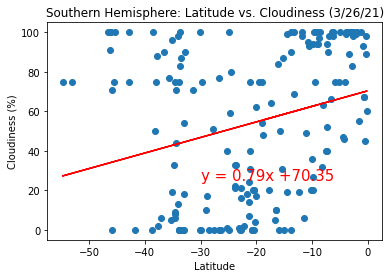

In [196]:
x_values = southern_df['Lat']
y_values = southern_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere: Latitude vs. Cloudiness (3/26/21)')
plt.annotate(line_eq,(-30,25),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save plot as png
plt.savefig('output_data_weatherpy/southernhem_cloudiness.png',bbox_inches='tight',facecolor='w')

plt.show()
# Plotting cloudiness trend in southern hemisphere.
# There is no significant trend observed.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.003689950711707993


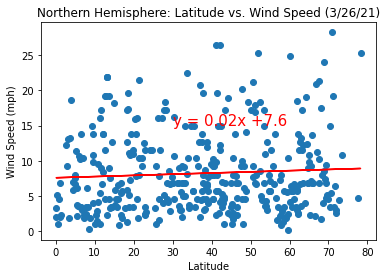

In [197]:
x_values = northern_df['Lat']
y_values = northern_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere: Latitude vs. Wind Speed (3/26/21)')
plt.annotate(line_eq,(30,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save plot as png
plt.savefig('output_data_weatherpy/northernhem_windspeed.png',bbox_inches='tight',facecolor='w')

plt.show()
# Plotting wind speed trend in northern hemisphere.
# There is no significant trend observed.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04250939892816552


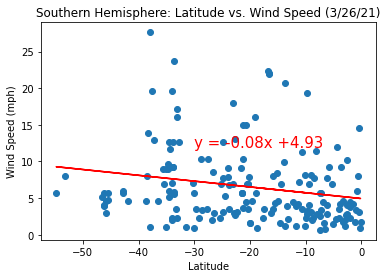

In [198]:
x_values = southern_df['Lat']
y_values = southern_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere: Latitude vs. Wind Speed (3/26/21)')
plt.annotate(line_eq,(-30,12),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save plot as png
plt.savefig('output_data_weatherpy/southernhem_windspeed.png',bbox_inches='tight',facecolor='w')

plt.show()
# Plotting wind speed trend in southern hemisphere.
# There is no significant trend observed.